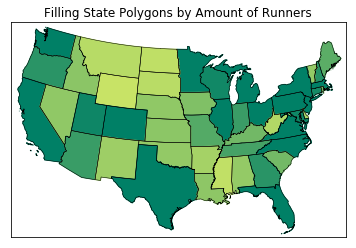

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  476,
'Rhode Island':   136,
'Massachusetts':   4586,
'Connecticut':    377,
'Maryland':   396,
'New York':    1324,
'Delaware':    47,
'Florida':     609,
'Ohio':  693,
'Pennsylvania':  842,
'Illinois':    771,
'California':  2049,
'Hawaii':  37,
'Virginia':    564,
'Michigan':    516,
'Indiana':    267,
'North Carolina':  499,
'Georgia':     317,
'Tennessee':   237,
'New Hampshire':   324,
'South Carolina':  136,
'Louisiana':   88,
'Kentucky':   138,
'Wisconsin':  392,
'Washington':  465,
'Alabama':     80,
'Missouri':    203,
'Texas':   1055,
'West Virginia':   41,
'Vermont':     80,
'Minnesota':  443,
'Mississippi':   27,
'Iowa':  111,
'Arkansas':    56,
'Oklahoma':    81,
'Arizona':     270,
'Colorado':    534,
'Maine':  186,
'Oregon':  312,
'Kansas':  92,
'Utah':  400,
'Nebraska':    85,
'Nevada':  85,
'Idaho':   93,
'New Mexico':  65,
'South Dakota':  34,
'North Dakota':  29,
'Montana':     36,
'Wyoming':      21,
'Alaska':     52}
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.summer # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Amount of Runners')
plt.show()

In [83]:
data = pd.read_csv("marathon_results_2017.csv")

In [84]:
state_abbreviation={}
for i in data['State']:
    if pd.isna(i):
        continue
    if i not in state_abbreviation:
        state_abbreviation[i] = 1
    else:
        state_abbreviation[i] += 1
full_name = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
state={}
for i in state_abbreviation.keys():
    if i not in full_name.keys():
        continue
    state[full_name[i]] = state_abbreviation[i]
state

{'Oregon': 312,
 'California': 2049,
 'Arizona': 270,
 'Colorado': 534,
 'Utah': 400,
 'Massachusetts': 4586,
 'New York': 1324,
 'North Carolina': 499,
 'Michigan': 516,
 'Tennessee': 237,
 'Texas': 1055,
 'Minnesota': 443,
 'Virginia': 564,
 'Indiana': 267,
 'District of Columbia': 156,
 'Maryland': 396,
 'New Hampshire': 324,
 'Connecticut': 377,
 'Iowa': 111,
 'Alabama': 80,
 'Idaho': 93,
 'Pennsylvania': 842,
 'Illinois': 771,
 'Alaska': 52,
 'Florida': 609,
 'Kansas': 92,
 'South Carolina': 136,
 'Wisconsin': 392,
 'Missouri': 203,
 'Ohio': 693,
 'New Jersey': 476,
 'Oklahoma': 81,
 'Washington': 465,
 'Georgia': 317,
 'Kentucky': 138,
 'Rhode Island': 136,
 'West Virginia': 41,
 'Nevada': 85,
 'Maine': 186,
 'Vermont': 80,
 'New Mexico': 65,
 'Nebraska': 85,
 'Arkansas': 56,
 'Louisiana': 88,
 'Montana': 36,
 'Wyoming': 21,
 'South Dakota': 34,
 'Delaware': 47,
 'Hawaii': 37,
 'Puerto Rico': 21,
 'Mississippi': 27,
 'Guam': 1,
 'North Dakota': 29,
 'Virgin Islands': 2}